<a href="https://colab.research.google.com/github/Ganesh-Esc/ML_K_NearestNegihborClassifier/blob/main/K_Nearest_Neighbor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found exis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


<Axes: >

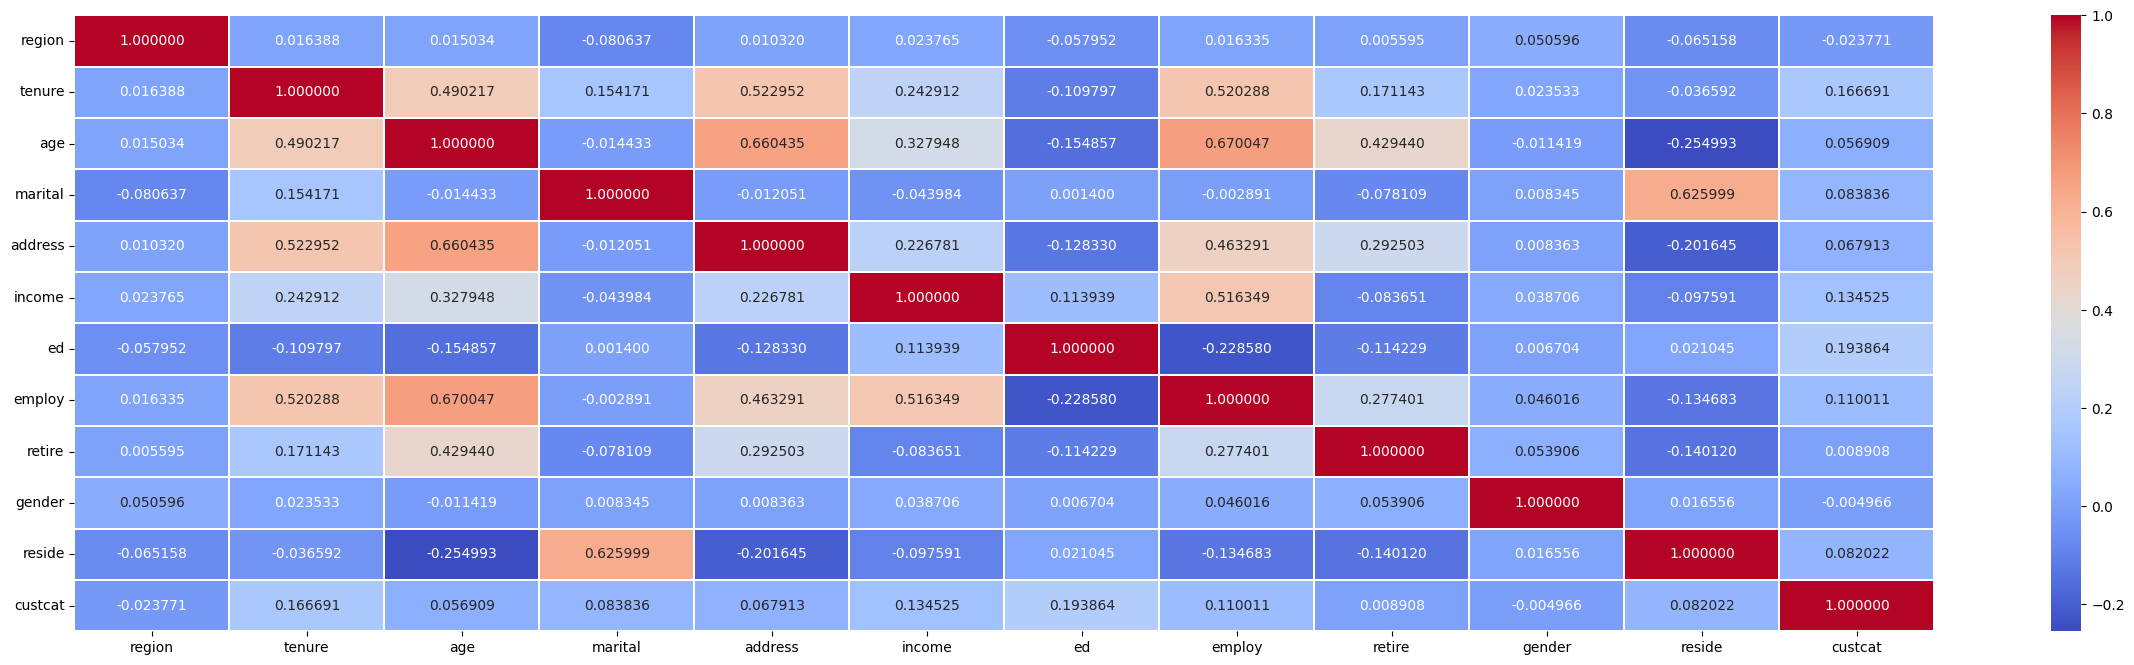

In [6]:
correlation_matrix=df.corr()
plt.figure(figsize=(30,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt='2f',linewidths=0.1)

In [7]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


In [10]:
X = df.drop('custcat',axis=1)
y = df['custcat']
X


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


In [12]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]], shape=(1000, 11))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=8)

In [14]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [15]:
yhat=knn_model.predict(X_test)
yhat

array([1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 3, 2, 1, 1, 1,
       4, 1, 4, 3, 4, 1, 1, 4, 1, 2, 1, 4, 2, 3, 2, 2, 3, 1, 1, 1, 3, 3,
       4, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 3, 4, 4, 4, 3, 2, 1, 1, 4, 2, 3,
       1, 2, 4, 2, 1, 3, 2, 3, 4, 3, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 4, 2,
       1, 1, 4, 2, 2, 3, 2, 1, 1, 2, 3, 3, 4, 1, 1, 2, 1, 3, 1, 3, 1, 4,
       3, 4, 1, 3, 1, 3, 1, 2, 1, 4, 2, 1, 1, 4, 2, 3, 4, 2, 3, 3, 2, 3,
       3, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 3, 1, 4, 1, 1, 1,
       3, 3, 2, 4, 1, 2, 2, 1, 4, 2, 4, 3, 1, 3, 1, 1, 4, 3, 3, 2, 1, 4,
       2, 2, 2, 4, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 4, 1, 3, 2, 2, 2, 2, 1,
       1, 1])

In [18]:
print("Test Accuracy score :",accuracy_score(y_test,yhat))

Test Accuracy score : 0.33


In [19]:
ks=10
acc=np.zeros((ks))
std_acc=np.zeros((ks))
for n in range(1,ks+1):
  knn_model=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
  yhat=knn_model.predict(X_test)
  acc[n-1]=accuracy_score(y_test,yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

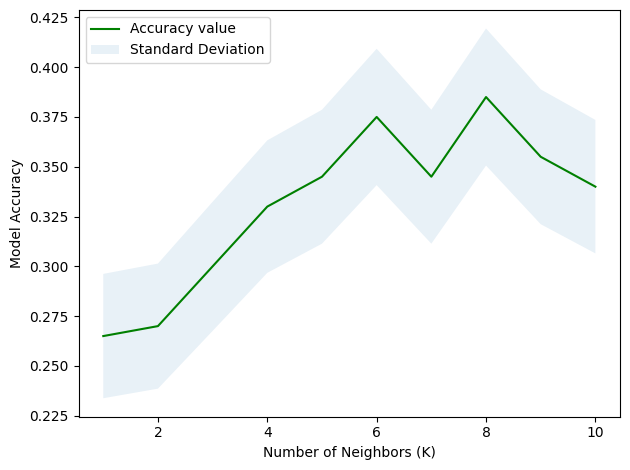

In [21]:
plt.plot(range(1,ks+1),acc,'g')
plt.fill_between(range(1,ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.385 with k = 8
